<a href="https://colab.research.google.com/github/vaish3496/15-Puzzle/blob/master/Digit_Recognition_Using_Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras import datasets
from keras.utils import to_categorical

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [ ]:
print(len(train_data),len(test_data))

60000 10000


In [ ]:
train_data[0].shape

(28, 28)

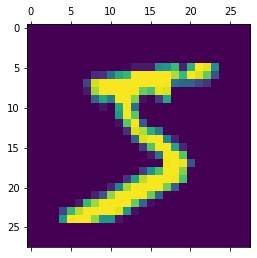

In [ ]:
plt.matshow(train_data[0])

In [ ]:
train_label[0]

5

In [ ]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data = train_data / 255
test_data = test_data / 255

train_data = train_data.reshape(train_data.shape[0],28,28,1)
test_data = test_data.reshape(test_data.shape[0],28,28,1)

print(train_label.shape)

train_label = to_categorical(train_label,10)
test_label = to_categorical(test_label,10)

print(train_label.shape)

(60000,)
(60000, 10)


In [ ]:
def CNN():
  model = Sequential()
  model.add(Convolution2D(8,3,activation='relu',input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(16,3,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = CNN()
model.fit(train_data,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5341 - accuracy: 0.8427
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0905 - accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0723 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0611 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0526 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0447 - accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0412 - accuracy: 0.9870
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0399 - accuracy: 0.9868
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0374 - accuracy: 0.9891
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [ ]:
from sklearn.metrics import accuracy_score

In [17]:
prediction = np.argmax(model.predict(test_data),axis=1)
test_label = np.argmax(test_label,axis=1)
print(accuracy_score(test_label,prediction))

0.9862
